## Demonstration of the functions in the ds_tools library, using Kaggle's Titanic dataset

### **Installation - do this if installing for the first time:**
`!pip install git+http://github.com/AdmiralWen/ds_tools.git`

### **Import main libraries**

In [2]:
# Import main libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing exploration library as de:
from ds_tools import exploration as de

### **Part I: Exploration**

In [3]:
# Import Titanic dataset:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### data_info()
Displays basic information about a dataframe. Useful for identifying the number of unique observations, null observations, etc.

In [4]:
# data_info(dataframe):
de.data_info(titanic)

,Type,Observations,Unique Observations,NaN Count,NaN Percent
PassengerId,int64,891,891,0,0.00%
Survived,int64,891,2,0,0.00%
Pclass,int64,891,3,0,0.00%
Name,object,891,891,0,0.00%
Sex,object,891,2,0,0.00%
Age,float64,714,89,177,19.87%
SibSp,int64,891,7,0,0.00%
Parch,int64,891,7,0,0.00%
Ticket,object,891,681,0,0.00%
Fare,float64,891,248,0,0.00%


### extreme_obs()
Displays the n (default n = 10) largest and smallest observations for a variable in a dataframe. If the boxplot argument is True, will also plot a boxplot for this variable. Use the whis argument to control the length of the whiskers (default is 1.5 IQR).

In [5]:
# extreme_obs(dataframe, variable, n = 10, boxplot = True, whis = 1.5):
de.extreme_obs(titanic, 'Age')

,10_Largest,Index_Largest,10_Smallest,Index_Smallest
0,80.0,630,0.42,803
1,74.0,851,0.67,755
2,71.0,96,0.75,469
3,71.0,493,0.75,644
4,70.5,116,0.83,78
5,70.0,672,0.83,831
6,70.0,745,0.92,305
7,66.0,33,1.00,164
8,65.0,54,1.00,172
9,65.0,280,1.00,183


### check_unique_by() and non_unique_items()
Checks if a dataframe is unique by a given list of columns. The variables argument can be either a single column name (string) or a list.

In [6]:
# check_unique_by(dataframe, variables):
de.check_unique_by(titanic, ['PassengerId'])

True

In [7]:
# non_unique_items(dataframe, variables):
de.non_unique_items(titanic, ['Ticket']).head()

,Ticket,nonUniqueItems_Count
0,CA. 2343,7
1,347082,7
2,1601,7
3,347088,6
4,CA 2144,6


### freq_tab()
Returns the frequency tabulation of the input variable as a Pandas dataframe. Specify drop_na = True to drop NaNs from the tabulation (default is False), and specify sort_by_count = False to sort the result alphabetically instead of by the frequency counts (default is True). Use the plot argument to specify the output type: frequency table, graph by count, or graph by percent (None, 'count', and 'percent' respectively).

In [8]:
# freq_tab(dataframe, variable, drop_na = False, sort_by_count = True, plot = None, fig_size = (16, 8)):
de.freq_tab(titanic, 'Pclass')

,Count,Percent,Cumul_Count,Cumul_Percent
3,491,55.11%,491,55.11%
1,216,24.24%,707,79.35%
2,184,20.65%,891,100.00%


In [9]:
# Specify whether to sort by count or by index:
de.freq_tab(titanic, 'Pclass', sort_by_count = False)

,Count,Percent,Cumul_Count,Cumul_Percent
1,216,24.24%,216,24.24%
2,184,20.65%,400,44.89%
3,491,55.11%,891,100.00%


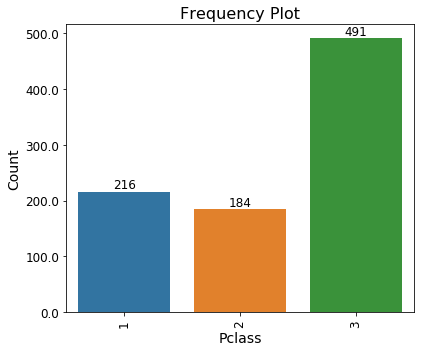

In [10]:
# freq_tab_plot:
fig, ax = plt.subplots(figsize = (6, 5))
de.freq_tab_plot(ax, titanic, 'Pclass', drop_na = False, sort_by_count = False, plot = 'count')
plt.show()

### summary_tab()
Returns the summary tabulation of the input variable as a Pandas dataframe. Be sure to enter the groupby_var and sum_var as strings; function can only support one group_by and sum variable. To sort by the grouping variable instead of the summary variable, specify sort_by_sum = False.

In [11]:
# summary_tab(dataframe, groupby_var, sum_var, sort_by_sum = True):
de.summary_tab(titanic, 'Pclass', 'Fare')

,Sum,Percent,Cumul. Sum,Cumul. Percent
1,"18,177.412499999984",63.35%,"18,177.412499999984",63.35%
3,"6,714.695100000002",23.40%,"24,892.107599999985",86.75%
2,"3,801.8416999999995",13.25%,"28,693.949299999986",100.00%


### describe_by()
Adds "Non-NaN Count" and "Sum" to df.groupby().describe().

In [12]:
# describe_by(dataframe, groupby_var, numeric_var):
de.describe_by(titanic, 'Pclass', 'Fare')

,Total Count,Non-NaN Count,Sum,Mean,Std. Dev.,Min,25th Pctl,Median,75th Pctl,Max
1,216,216,18177.4125,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184,184,3801.8417,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491,491,6714.6951,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


### na_per_column()
Functions for viewing the NaN values of a dataset by column.

In [14]:
# na_per_columdataframe):
de.na_per_column(titanic)

,Count,Percent
PassengerId,0,0.00%
Survived,0,0.00%
Pclass,0,0.00%
Name,0,0.00%
Sex,0,0.00%
Age,177,19.87%
SibSp,0,0.00%
Parch,0,0.00%
Ticket,0,0.00%
Fare,0,0.00%


### split_column()
Splits a variable of a dataframe into multiple columns. You can specify the delimiter (which must be a string) using the delimiter argument, and the exp_cols_prefix argument (also a string) is used to prefix the split column names. The merge_orig and drop_orig arguments are used to control whether to merge back to the original dataframe and whether to drop the original column in the output.

In [17]:
# split_column(dataframe, variable, delimiter, exp_cols_prefix, merge_orig = True, drop_orig = False):
titanic2 = de.split_column(titanic, variable = 'Name', delimiter = ',', exp_cols_prefix = 'Name_')

# (In this example it'd be more meaningful to rename the results afterwards):
titanic2.rename(columns = {'Name_0':'Last_Name', 'Name_1':'First_Name'}, inplace = True)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


### correlation_heatmap()
Creates a heatmap of the correlation matrix using the input dataframe and the variables list. The var_list argument should be a list of variable names (strings) that you wish to compute correlations for. Use sns_font_scale and fig_size to set the font and graph sizes.

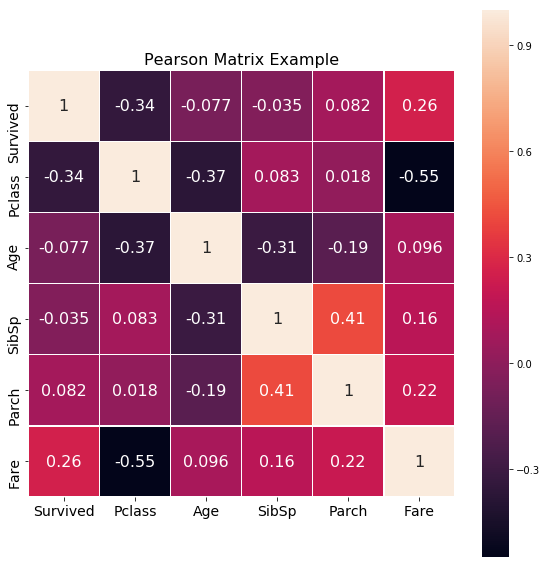

In [24]:
# correlation_heatmap:
corr_vars = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(figsize = (8, 8))
de.correlation_heatmap(ax, titanic, corr_vars, method = 'pearson', plot_title = 'Pearson Matrix Example', data_label_size = 16)
plt.show()

#de.correlation_heatmap(titanic, corr_vars, sns_font_scale = 1.5, fig_size = (10, 10))

### custom_boxplot()
Creates a custom boxplot based on pre-calculated precentile metrics (built-in boxplot functions are often designed to generate from underlying data; it doesn't allow you to set the actual box & whisker positions). This function requires the percentile metrics to be in a dataframe. Each row of the dataframe should contain the name of the category we have metrics for, as well as 5 additional columns of percentile metrics in increasing order.

In [25]:
# Some sample data:
data = pd.DataFrame([{'category':'Dept A', 'p10':1, 'p25':4, 'p50':7, 'p75':8, 'p90':10},
                     {'category':'Dept B', 'p10':0.2, 'p25':2.5, 'p50':5.75, 'p75':7.3, 'p90':9.1},
                     {'category':'Dept C', 'p10':-2, 'p25':2, 'p50':4, 'p75':8, 'p90':12}])
data

,category,p10,p25,p50,p75,p90
0,Dept A,1.0,4.0,7.00,8.0,10.0
1,Dept B,0.2,2.5,5.75,7.3,9.1
2,Dept C,-2.0,2.0,4.00,8.0,12.0


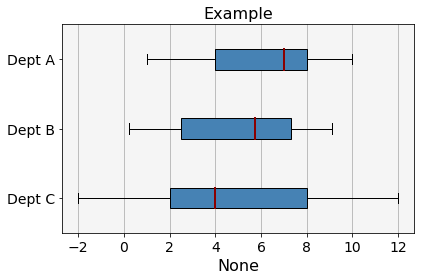

In [32]:
# custom_boxplot:
fig, ax = plt.subplots(figsize = (6, 4))
de.custom_boxplot(ax, data, 'category', ['p10', 'p25', 'p50', 'p75', 'p90'], plot_title = 'Example')
plt.show()

### **Part II: Evaluation**

In [33]:
from ds_tools import evaluation as ev

### plot_confusion_matrix()
Plots a confusion matrix given actual and predicted labels (can handle more than 2 classes).

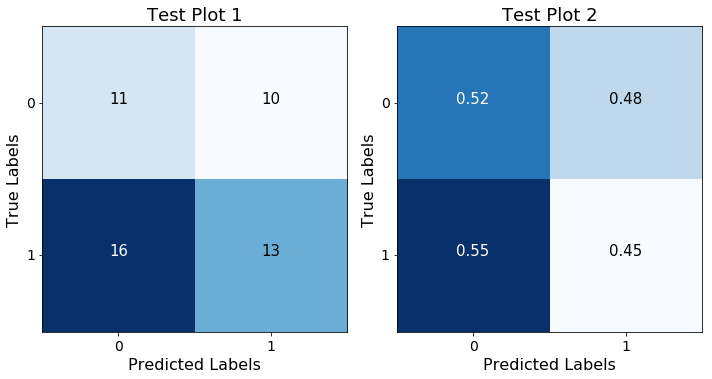

In [37]:
# plot_confusion_matrix:
import random
t = [random.randrange(0, 2, 1) for i in range(50)]
p = [random.randrange(0, 2, 1) for i in range(50)]

fig, ax = plt.subplots(1, 2, figsize = (10, 8))
ev.plot_confusion_matrix(ax[0], t, p, normalize = False, title = 'Test Plot 1', cmap = plt.cm.Blues)
ev.plot_confusion_matrix(ax[1], t, p, normalize = True, title = 'Test Plot 2', cmap = plt.cm.Blues)
plt.show()

### gini() and gini_plot()
Calculates gini coefficient (raw or normalized) given the actual, predicted, and optionally weight vectors. Use gini_plot() to plot the lorenz curves.

In [40]:
# gini:
t = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 6])
p = np.array([0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.31, 0.4, 0.73, 0.31, 0.4, 0.6, 0.2, 0.32, 0.53, 0.74, 0.1, 0.34,
                     0.9, 0.2, 0.11, 0.71, 0.3, 0.51, 0.61, 0.72, 0.52, 0.29, 0.8])
w = np.array([8, 3, 4, 9, 6, 2, 13, 8, 11, 8, 7, 9, 8, 5, 13, 2, 7, 10, 16, 6, 8, 10, 1, 11, 15, 14, 7, 10, 12, 11])
ev.gini(actual = t, predicted = p, weight = w, normalize = True)

0.4949267192784666

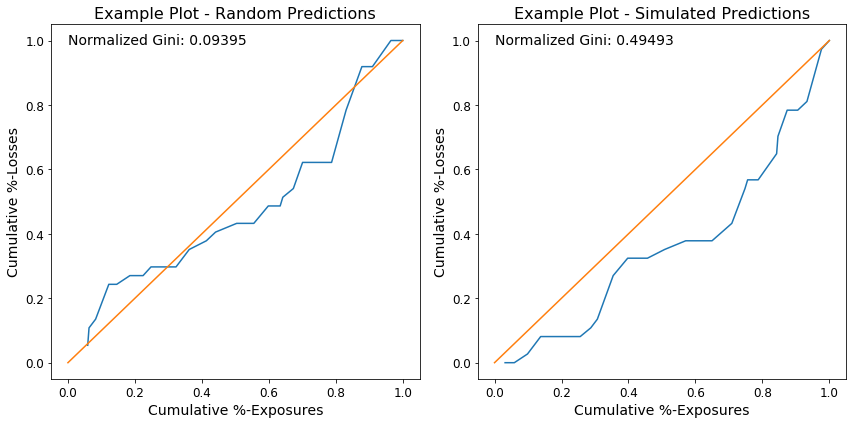

In [44]:
# gini_plot:
import random
t = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 6])
p = np.array([0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.31, 0.4, 0.73, 0.31, 0.4, 0.6, 0.2, 0.32, 0.53, 0.74, 0.1, 0.34,
              0.9, 0.2, 0.11, 0.71, 0.3, 0.51, 0.61, 0.72, 0.52, 0.29, 0.8])
w = np.array([8, 3, 4, 9, 6, 2, 13, 8, 11, 8, 7, 9, 8, 5, 13, 2, 7, 10, 16, 6, 8, 10, 1, 11, 15, 14, 7, 10, 12, 11])
r = np.array([round(random.random(), 1) for i in range(30)])

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ev.gini_plot(ax[0], actual = t, predicted = r, weight = w, normalize = True, title = 'Example Plot - Random Predictions')
ev.gini_plot(ax[1], actual = t, predicted = p, weight = w, normalize = True, title = 'Example Plot - Simulated Predictions')
plt.show()